# <center> 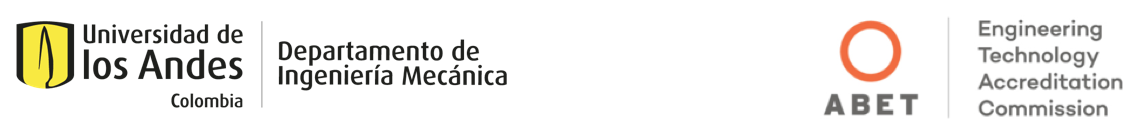
## <span style="color: #147CA6"><center> IMEC 2001-Herramientas Computacionales
## <span style="color: #1AA3D9"><center> Taller 4-Cálculo Numérico

### <span style="color: #147CA6">Fecha Límite de Entrega (Bloque Neón): <font color="#1AA3D9">TODO</font>
___
### <span style="color: #147CA6"> Descripción de la actividad

La actividad tiene como objetivo demostrar su manejo en el uso de métodos numéricos para interpolar, diferenciar e integrar.

### <span style="color: #147CA6"> Tener en Cuenta

1. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión <font color="#1AA3D9">'.ipynb'</font>).

**Nota:** <font color="#1AA3D9">El nombre del archivo debe ser: `Taller4_NombreApellido1_NombreApellido2.ipynb`.</font>

---

### <span style="color: #1AA3D9"><center> Item 1: Interpolación

Las curvas características son una representación de la relación cabeza-caudal de una bomba  al  utilizar  un  rotor  de  un  diámetro  específico,esta se  utiliza  en  el  diseño  de sistemas hidráulicos.En un sistema hidráulico se colocó una válvula de control y se varió el  caudal  de  forma  tal que  se  pudiera  determinar  la  cabeza brindada  por  la  bomba  al sistema. Los datos obtenidos fueron los siguientes:

<style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: center;
        }
        
        th, td {
            font-family: Arial, sans-serif;
        }
        th:first-child, td:first-child {
            color: #1AA3D9;
        }
</style>

<table>
        <tr>
            <th>#</th>
            <th>Caudal [m<sup>3</sup>/s]</th>
            <th>Presión [kPa]</th>
            <th>Potencia efectiva consumida [kW]</th>
        </tr>
        <tr>
            <td>1</td>
            <td>0.0</td>
            <td>199.9</td>
            <td>1.468</td>
        </tr>
        <tr>
            <td>2</td>
            <td>0.000660</td>
            <td>213.7</td>
            <td>1.601</td>
        </tr>
        <tr>
            <td>3</td>
            <td>0.002300</td>
            <td>206.8</td>
            <td>1.888</td>
        </tr>
        <tr>
            <td>4</td>
            <td>0.003550</td>
            <td>193.1</td>
            <td>2.206</td>
        </tr>
        <tr>
            <td>5</td>
            <td>0.004050</td>
            <td>186.2</td>
            <td>2.302</td>
        </tr>
        <tr>
            <td>6</td>
            <td>0.005040</td>
            <td>172.4</td>
            <td>2.559</td>
        </tr>
        <tr>
            <td>7</td>
            <td>0.005650</td>
            <td>158.6</td>
            <td>2.707</td>
        </tr>
</table>

En el laboratorio se midió presión, pero se puede pasar a unidades de cabeza fácilmente (el fluido es agua).

1. Realice  un  interpolador  de  grado  cúbico  que  permita evaluar  cabeza  para diferentes caudales.
2. Se  tienen  dos  escenarios  en  los  cuales  puede ser  utilizada  la  bomba.  En el primero se tendría un caudal de 0.001m^3/s,mientras que en el otro se tendría un caudal de 0.004 m^3/s. Calcule la cabeza en ambos casos con el interpolador.
3. Calcule la potencia hidráulica para cada uno de los puntos de operación de los datos medidos. 
4. Calcule la eficiencia con la potencia hidráulica y la potencia efectiva consumida.
5. ¿En cual de los dos puntos de operación del numeral dos es mejor poner la bomba teniendo en cuenta el criterio de eficiencia ?

<font color="#1AA3D9">Importante: Los resultados se deben presentar en unidades S.I. 

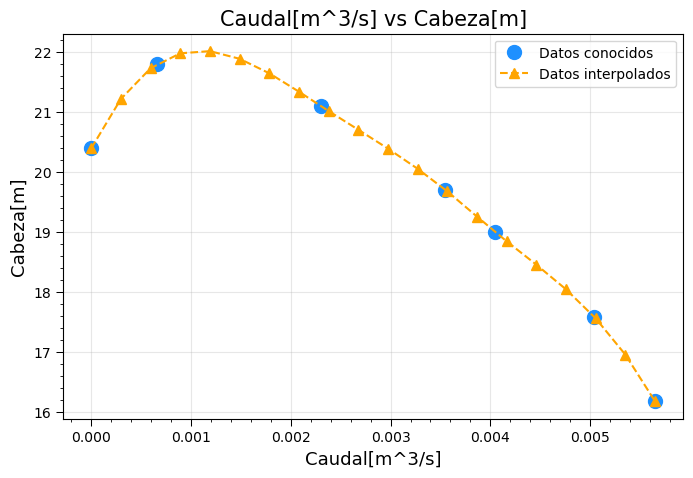

In [32]:

import matplotlib.pyplot as plt
import pandas as pd

# OLS
import numpy as np
import scipy
import sklearn

def formato_grafica(titulo, ejex, ejey):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(None, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.legend(loc=True)
    plt.tight_layout;

caudal = [0, 0.000660, 0.002300, 0.003550, 0.004050, 0.005040, 0.005650]
presion = [199.9, 213.7, 206.8, 193.1, 186.2, 172.4, 158.6]
potencia = [1.468, 1.601, 1.888, 2.206, 2.302, 2.559, 2.707]
gravedad = 9.8
densidad=1000
cabeza=[]

i  = 0
while i < len(presion):
     presion[i] = presion[i]*1000
     i+=1

i  = 0
while i < len(presion):
     cabeza.append(presion[i]/(densidad*gravedad))
     i+=1

x = caudal
y=cabeza 
#print(cabeza)

# PASO 1. Creamos el interpolador spline cúbico
itp_spline = scipy.interpolate.splrep(x, y, k=3) # k es el grado del spline (para cúbico, k=3)

# PASO 2. Evaluamos el interpolador spline cúbico
x_new = np.linspace(x[0], x[6],num=20)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)
y_new

hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_new, y_new, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')
formato_grafica(titulo='Caudal[m^3/s] vs Cabeza[m]', 
                ejex='Caudal[m^3/s]', 
                ejey='Cabeza[m]')

___
### <span style="color: #1AA3D9"><center> Item 2: Derivación numérica

En la carpeta de data de esta clase encontraráel archivo <font color="#1AA3D9">Datos derivación numérica.txt</font>, en este se recopilan algunos datos del desplazamiento de un avión supersónico en un espacio  aéreo  de  prueba.  Si  abren  el  archivo,  encontrarán  que  las  columnas  no  están con  headers  ni  tampoco  vienen  los  valores  separados  por  comas  o  algún  delimitador. Teniendo en cuenta lo anterior, deberán cargar el archivo de la siguiente forma:

In [1]:
import pandas as pd
dataframe_datos=pd.read_csv("./data/Datos derivación numérica.txt", delimiter='\t', header=None, names=['Elapsed time(s)','Satellites', 'Speed(km/h)', "Distance (m)"])

Realizando dicho proceso generarán un dataframe que tiene valores de tiempo, satélites de medición, velocidad y distancia.Los satélites no representan información valiosa.

1. Encuentre la velocidad del avión derivando numéricamente la distancia. Realice una gráfica de los datos.
2. Compare la velocidad derivada numéricamente con la velocidad reportada por el sensor de velocidad propio del avión ¿Existen discrepancias? Grafique ambas.
3. Calcule la velocidad promedio del avión.

<font color="#1AA3D9">Importante: Tenga en cuenta las unidades de los datos

___
### <span style="color: #1AA3D9"><center> Item 3: Integración numérica

En análisis  de  sistemas  de  control  se  intenta  automatizar el  comportamiento  de actuadores  con  el  fin  de  obtener  unas  condiciones  físicas  ideales.  En  este  caso  se analizará el comportamiento del aire acondicionado en una casa de invierno. Cuando el sistema de control encuentra  que  la  temperatura  es mayora 20°C,  este  apaga  la calefacción. Si la temperatura es menor, se activa el motor de la calefacción, calentando así el cuarto en el que se encuentra. En el archivo <font color="#1AA3D9">AireAcondicionadoData.csv</font> encontrará un intervalo de tiempo en el que se tomaron datos de la potencia que consumía el motor.

1. Calcule el calor brindado por la calefacción a lo largo de la medición.
2. Grafique la evolución del calor brindado a lo largo de la medición.